In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [14]:
data_path = 'data.csv'
data = pd.read_csv(data_path, sep=';')


print(len(data))
features_cause = [col for col in data.columns if col.startswith('prct')]
somme_pourcentage=data[features_cause].sum(axis=1)
data = data.loc[(somme_pourcentage >= 99.9) & (somme_pourcentage <= 100.1)]
print(len(data))


data.head()

8154
7913


,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,...,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,...,8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,...,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


In [15]:
data_clustering = data[data['date'].apply(lambda x: int(x.split('-')[0])) < 2023]

In [18]:
data_clustering = data_clustering.groupby('gare_depart').agg({'duree_moyenne': 'mean',
                                         'retard_moyen_arrivee': 'mean',
                                         'nb_train_prevu': 'mean',
                                         'nb_train_retard_arrivee' :'mean'}).reset_index()

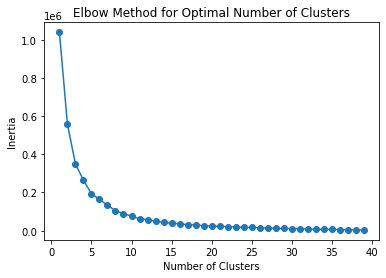

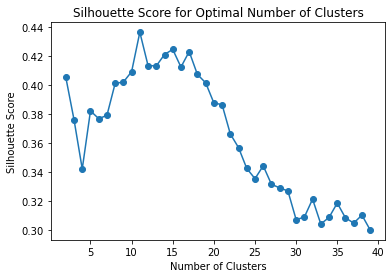

In [20]:
inertia = []

# Define a range of cluster numbers to test
cluster_range = range(1, 40)

# Calculate inertia for each cluster number
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data_clustering[["duree_moyenne",'retard_moyen_arrivee','nb_train_prevu', 'nb_train_retard_arrivee']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Create an empty list to store silhouette scores
silhouette_scores = []

# Define a range of cluster numbers to test
cluster_range = range(2, 40)  # Start with a minimum of 2 clusters

# Calculate silhouette scores for each cluster number
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_clustering[["duree_moyenne",'retard_moyen_arrivee','nb_train_prevu', 'nb_train_retard_arrivee']])
    silhouette_avg = silhouette_score(data_clustering[["duree_moyenne",'retard_moyen_arrivee','nb_train_prevu', 'nb_train_retard_arrivee']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Score graph
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

In [23]:
# Fit k-means on 11 clusters
kmeans = KMeans(n_clusters=11, random_state=0)
cluster_labels = kmeans.fit_predict(data_clustering[["duree_moyenne",'retard_moyen_arrivee','nb_train_prevu', 'nb_train_retard_arrivee']])
data_clustering['cluster'] = cluster_labels

In [24]:
data_clustering.head()
data_clustering.to_csv("./data_clustering_encodge_gare.csv", sep=";")